---
# Libreria Matplotlib
- Funciones pyplot
- Modelo de Orientación a Objetos
- Apariencia
- Tipos de gráficos
- Estilos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de datos de Contagios por día

In [4]:
df = pd.read_csv('datos-covid-etareo.csv')
df.head()

,Grupo de edad,Sexo,Fecha,Contagios
0,00 - 04 años,M,2020-03-25,4
1,05 - 09 años,M,2020-03-25,2
2,10 - 14 años,M,2020-03-25,7
3,15 - 19 años,M,2020-03-25,8
4,20 - 24 años,M,2020-03-25,25


In [6]:
print(df['Fecha'].min(), df['Fecha'].max())

2020-03-25 2020-11-13


In [16]:
df2 = df.groupby('Fecha').sum().reset_index()
print(df2)
#df2=df2[["Contagios"]]
df3=df2[["Fecha","Contagios"]].copy()

         Fecha                                      Grupo de edad  \
0   2020-03-25  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
1   2020-03-26  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
2   2020-03-27  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
3   2020-03-28  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
4   2020-03-29  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
..         ...                                                ...   
87  2020-10-30  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
88  2020-11-02  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
89  2020-11-06  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
90  2020-11-09  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
91  2020-11-13  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   

                                  Sexo  Contagios  
0   MMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFF       1012  
1   MMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFF       1252  
2   MMMMMMMMMMM

In [32]:
df3.head()

,Fecha,Contagios
0,2020-03-25,1012
1,2020-03-26,1252
2,2020-03-27,1434
3,2020-03-28,1723
4,2020-03-29,1906


### Gráfico utilizando las funciones pyplot

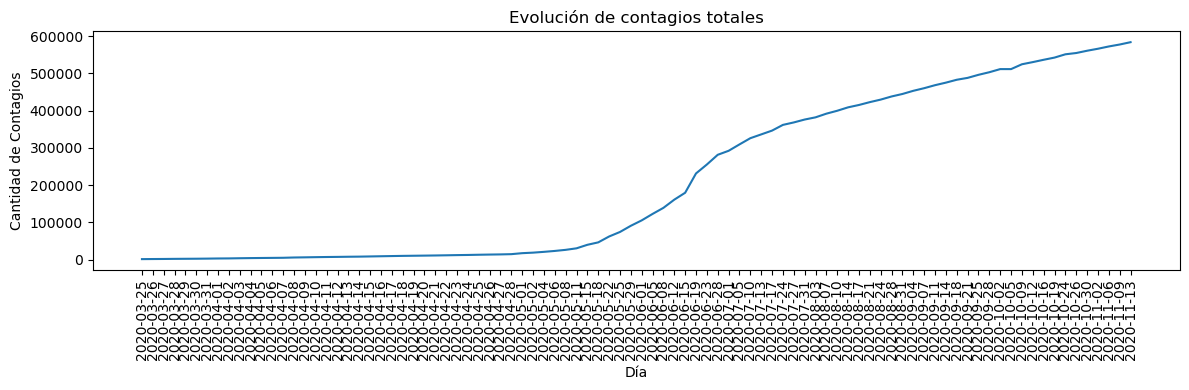

In [20]:
plt.figure(figsize=(12,4))
plt.plot(df3["Fecha"],df3["Contagios"])
plt.title('Evolución de contagios totales')
plt.xlabel('Día')
plt.ylabel('Cantidad de Contagios')
plt.xticks(rotation=90)
plt.tight_layout()

### Subgráficos

In [22]:
df_m = df[df['Sexo']=='M'].groupby('Fecha').sum().reset_index(drop=True)
df_m.head()

,Grupo de edad,Sexo,Contagios
0,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,496
1,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,610
2,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,704
3,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,867
4,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,959


In [24]:
df_f = df[df['Sexo']=='F'].groupby('Fecha').sum().reset_index(drop=True)

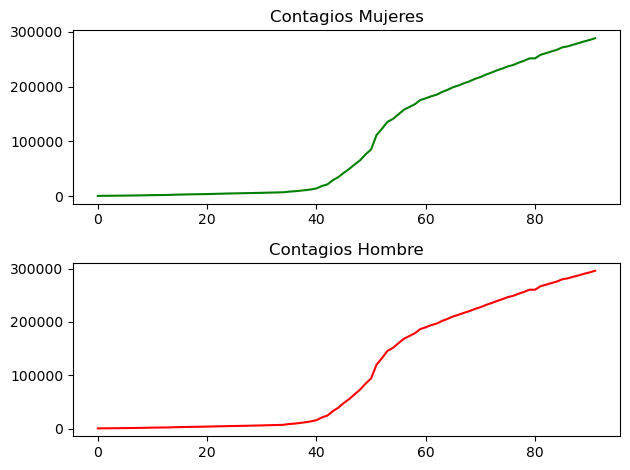

In [40]:
plt.subplot(2,1,2)
plt.plot(df_m["Contagios"], 'r')
plt.title('Contagios Hombre')

plt.subplot(2,1,1)
plt.plot(df_f["Contagios"], 'g')
plt.title('Contagios Mujeres')

plt.tight_layout()

### Utilizando la orientación a objetos en la libreria Matplotlib

Text(0.5, 1.0, 'Total de Contagiados')

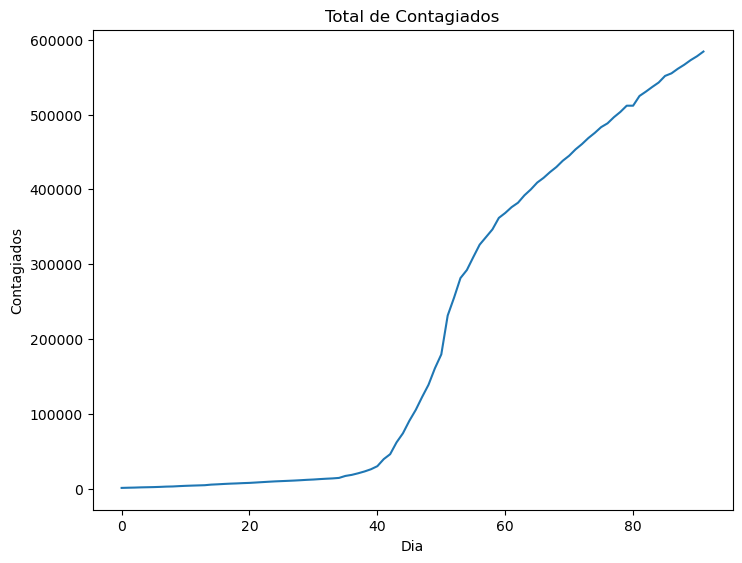

In [42]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot(df3["Contagios"])
axe.set_xlabel('Dia')
axe.set_ylabel('Contagiados')
axe.set_title('Total de Contagiados')

### Posicionando varios ejes en una misma figura

Text(0.5, 1.0, 'Mujeres')

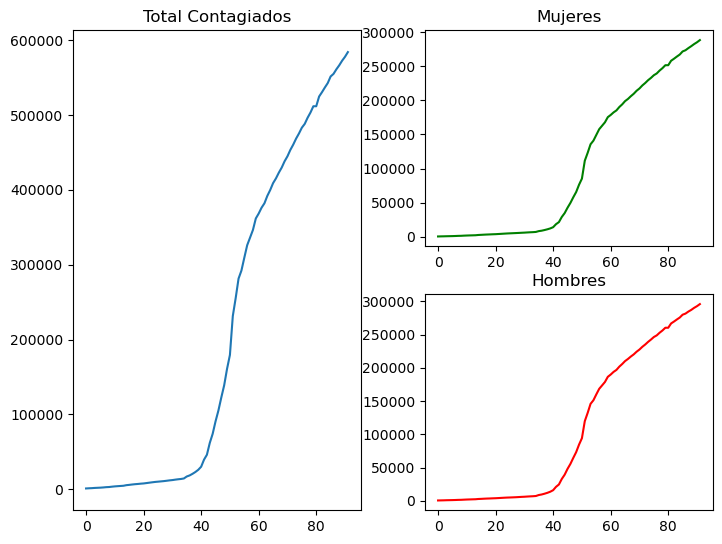

In [74]:
fig = plt.figure()
axe1 = fig.add_axes( [0, 0, 0.45, 1] )
axe2 = fig.add_axes( [0.55, 0, 0.45, 0.45] )
axe3 = fig.add_axes( [0.55, 0.55, 0.45, 0.45] )

axe1.plot(df3["Contagios"])
axe2.plot(df_m["Contagios"], 'r')
axe3.plot(df_f["Contagios"], 'g')

axe1.set_title('Total Contagiados')
axe2.set_title('Hombres')
axe3.set_title('Mujeres')

### Grilla de gráficos con orientación a objetos

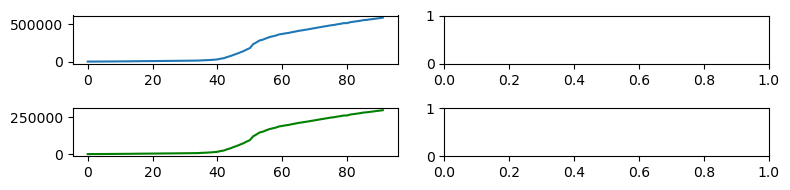

In [126]:
fig, axes = plt.subplots( nrows=2 , ncols=2,figsize=(8,2) )
axes[0][0].plot(df3["Contagios"])
axes[1][0].plot(df_m["Contagios"],'g')
plt.tight_layout()

### Graficar más de una serie en un juego de ejes

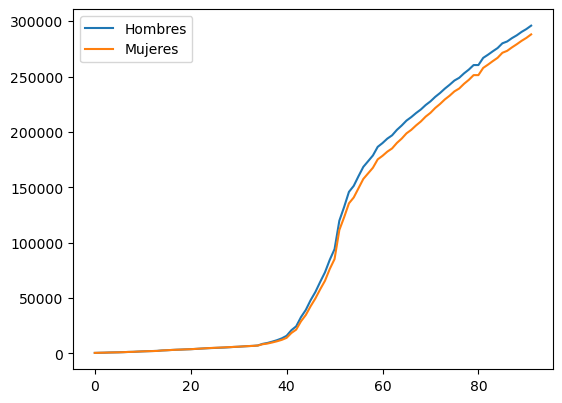

In [44]:
fig = plt.figure()
axe = fig.add_axes([0.2, 0.2, 0.75, 0.75])
axe.plot(df_m["Contagios"], label='Hombres')
axe.plot(df_f["Contagios"], label='Mujeres')
axe.legend(loc=0)

### Guardar un grafico como imagen

In [49]:
fig.savefig('mi-grafico.jpeg', dpi=100)

### Personalizando la apariencia

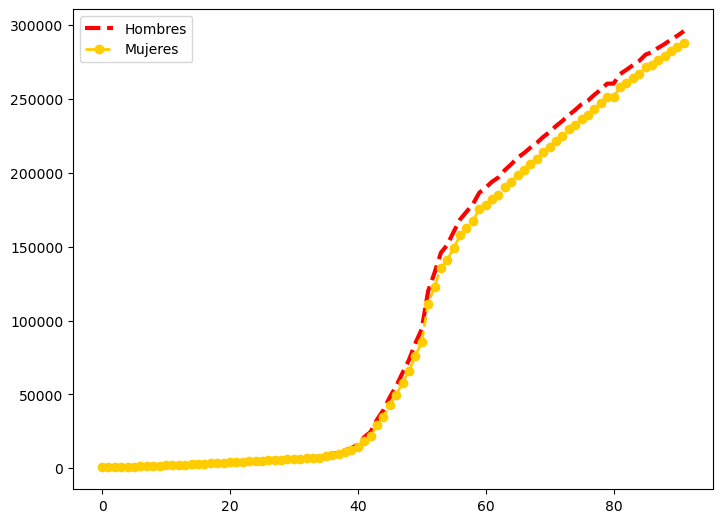

In [106]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot(df_m["Contagios"], label='Hombres', color='red', linestyle='dashed', linewidth=3)
axe.plot(df_f["Contagios"], label='Mujeres', c='#FFCC00', ls='--', lw=2, marker='o')
axe.legend(loc=0)

### Límites del gráfico

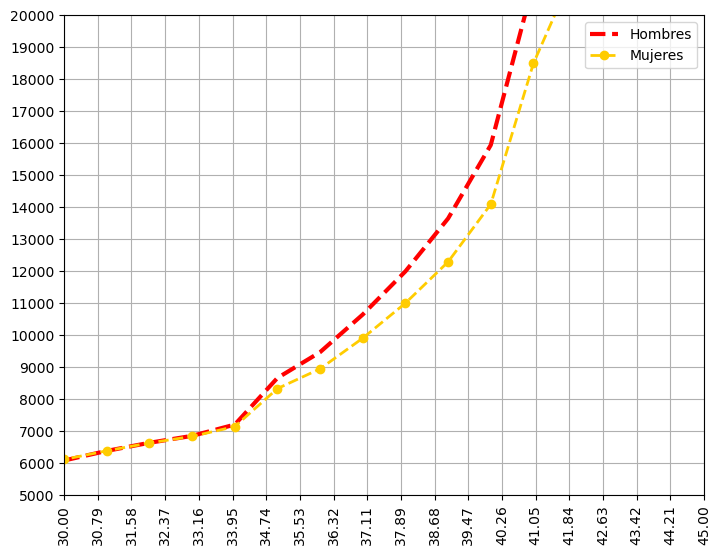

In [52]:
import matplotlib.ticker as ticker
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot(df_m["Contagios"], label='Hombres', color='red', linestyle='dashed', linewidth=3)
axe.plot(df_f["Contagios"], label='Mujeres', c='#FFCC00', ls='--', lw=2, marker='o')
axe.set_xlim( [30,45] )
axe.set_ylim( [5000,20000] )
axe.xaxis.set_major_locator(ticker.LinearLocator(20)) 
axe.yaxis.set_major_locator(ticker.MultipleLocator(1000)) 
plt.xticks(rotation=90)
axe.legend(loc=0)
axe.grid()

## Tipos de Gráfico

### A. Histograma

In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.hist( df3['Contagios'], bins=20 )

axe.set_xlabel('Contagios')
fig.show()

### B. Diagrama de Caja

In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.boxplot( df3['Contagios'].dropna() )

fig.show()

### C. Diagrama de Dispersión

In [ ]:
 df3['Contagios']

,BasePay
0,167411.18
1,155966.02
2,212739.13
3,77916.00
4,134401.60
...,...
116474,98271.01
116475,111678.04
116476,78435.20
116477,112710.00


In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.scatter( df3['Fecha'], df3['Contagios'] )

axe.set_xlabel('Fecha')
axe.set_ylabel('Contagios')

### D. Diagrama de Barras

In [ ]:
df3 = df[df['Fecha']==df['Fecha'].max()].groupby('Grupo de edad').sum()\
                                        .reset_index()
df3.head()

In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.bar( df3['Grupo de edad'], df3['Contagios'] )

axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

### E. Diagrama de Torta

In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.pie(df3['Contagios'], labels=df3['Grupo de edad'], autopct='%1.1f%%' )

fig.show()

### Combinación de diagramas

In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )

axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

### Estilos

In [ ]:
plt.style.available

In [121]:
plt.style.use('bmh')

In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )
axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

In [123]:
plt.style.use('ggplot')

In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )
axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

In [125]:
plt.style.use('fivethirtyeight')

In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )
axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')